In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
df_train= pd.read_csv('Google_Stock_Price_Train.csv')

In [5]:
training_set = df_train.iloc[:,1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
from sklearn.preprocessing import MinMaxScaler



In [7]:
sc= MinMaxScaler(feature_range=(0,1))
scaled_training_Set = sc.fit_transform(training_set)
scaled_training_Set.shape

(1258, 1)

In [8]:
# creating 60 timesteps and give output
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(scaled_training_Set[i-60:i,0])
  y_train.append(scaled_training_Set[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [10]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #observation , timestep, indicator

In [11]:
x_train.shape

(1198, 60, 1)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout #to avoid overfitting


Using TensorFlow backend.


In [13]:
regressor = Sequential()

In [14]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))

In [15]:
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(Dense(units=1))

In [21]:
regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])  #rmsprop is also good choice for rnn

In [27]:
regressor.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0024 - accuracy: 0.0017
Epoch 2/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0025 - accuracy: 0.0017
Epoch 3/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0023 - accuracy: 0.0017
Epoch 4/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0024 - accuracy: 0.0017
Epoch 5/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0022 - accuracy: 0.0017
Epoch 6/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0023 - accuracy: 0.0017
Epoch 7/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0025 - accuracy: 0.0017
Epoch 8/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0021 - accuracy: 0.0017
Epoch 9/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0022 - accuracy: 0.0017
Epoch 10/50
1198/1198 [==============================] - 7s 6ms/step - loss: 0.002

In [28]:
df_test= pd.read_csv('Google_Stock_Price_Test.csv')

In [29]:
real_stock_price = df_test.iloc[:,1:2].values
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [31]:
df_train,df_test

(            Date    Open    High     Low   Close      Volume
 0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
 1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
 2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
 3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
 4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
 ...          ...     ...     ...     ...     ...         ...
 1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
 1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
 1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
 1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
 1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000
 
 [1258 rows x 6 columns],
          Date    Open    High     Low   Close     Volume
 0    1/3/2017  778.81  789.63  775.80  786.14  1,657,300
 1    1/4/2017  788.36  791.34  783.16  786.90  1,073,000
 2    1/5/2017  786.08  794.48  785.02  794.02  1,335,

In [32]:
df_total= pd.concat((df_train['Open'],df_test['Open']),axis=0)

In [33]:
inputs=df_total[len(df_total)-len(df_test)-60:].values

In [36]:
inputs=inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [37]:
inputs= sc.transform(inputs)

In [38]:
# creating 60 timesteps and give output
x_test=[]

for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)

In [39]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1)) #observation , timestep, indicator

In [41]:
predicted_stock_price=regressor.predict(x_test)
predicted_stock_price= sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[788.41766],
       [785.97845],
       [786.1521 ],
       [786.9131 ],
       [789.2456 ],
       [793.71875],
       [797.50854],
       [798.5654 ],
       [798.5451 ],
       [798.3835 ],
       [798.35614],
       [798.33374],
       [798.39685],
       [799.1215 ],
       [800.15826],
       [804.50964],
       [810.47345],
       [816.57416],
       [819.4932 ],
       [815.5589 ]], dtype=float32)

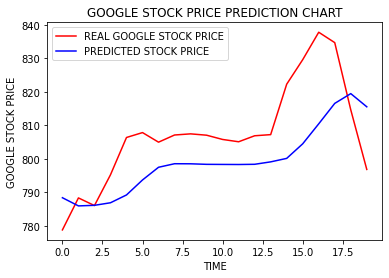

In [42]:
#visualisation of trends of stock price

plt.plot(real_stock_price,color='red',label='REAL GOOGLE STOCK PRICE')
plt.plot(predicted_stock_price,color='blue',label='PREDICTED STOCK PRICE')
plt.title('GOOGLE STOCK PRICE PREDICTION CHART')
plt.xlabel('TIME')
plt.ylabel('GOOGLE STOCK PRICE')
plt.legend()
plt.show()